3.1 Warming Up Exercises - Basic Inspection and Exploration:
Problem 1 - Data Read, Write and Inspect:

In [ ]:
# Q1
import pandas as pd

# Step 1: Loading csv file dataset
df = pd.read_csv("bank.csv")

# Step 2: Inspection
object_columns = df.select_dtypes(include="object").columns
print("Columns with object dtype:\n", object_columns)

print("\nUnique values of object columns:")
for col in object_columns:
    print(f"\nColumn: {col}")
    print(df[col].unique())

print("\nNull values in each column:")
print(df.isnull().sum())

# Step 3: Drop object columns and save new CSV
df_numeric = df.select_dtypes(exclude="object")
df_numeric.to_csv("banknumericdata.csv", index=False)

# Step 4: Read the numeric CSV and show summary statistics
df_num = pd.read_csv("banknumericdata.csv")
print("\nSummary statistics:")
print(df_num.describe())



Columns with object dtype:
 Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

Unique values of object columns:

Column: job
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']

Column: marital
['married' 'single' 'divorced']

Column: education
['tertiary' 'secondary' 'unknown' 'primary']

Column: default
['no' 'yes']

Column: housing
['yes' 'no']

Column: loan
['no' 'yes']

Column: contact
['unknown' 'cellular' 'telephone']

Column: month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']

Column: poutcome
['unknown' 'failure' 'other' 'success']

Column: y
['no' 'yes']

Null values in each column:
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign

3.2 Exercises - Data Cleaning and Transformations with ”Titanic Dataset”:

Null values in Age column: 177
Age null values removed.

Data after one-hot encoding:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin  Embarked_C  Embarked_Q  Embarked_S  
0      0         A/5 21171   7.2500   NaN       False       False        True  
1      0          PC 17599  71.2833   C85        True       False       Fa

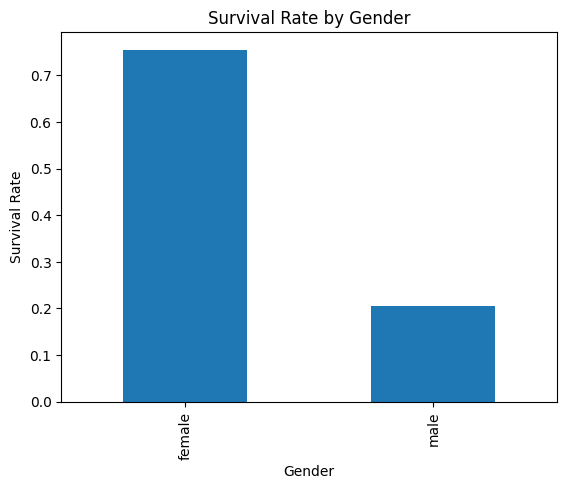


Survival rate by Embarked port:
Embarked_port
C    0.613636
Q    0.285714
S    0.362816
Name: Survived, dtype: float64


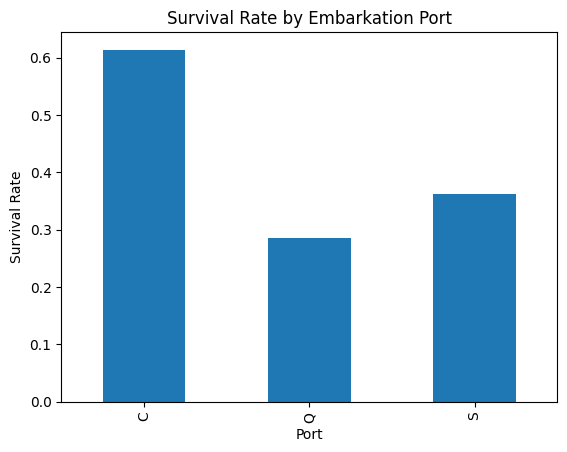


Survival by Pclass and Age Group:
Pclass  Age_Group    
1       (0.419, 19.0]    0.809524
        (19.0, 25.0]     0.761905
        (25.0, 31.8]     0.666667
        (31.8, 41.0]     0.777778
        (41.0, 80.0]     0.506667
2       (0.419, 19.0]    0.742857
        (19.0, 25.0]     0.400000
        (25.0, 31.8]     0.416667
        (31.8, 41.0]     0.461538
        (41.0, 80.0]     0.363636
3       (0.419, 19.0]    0.333333
        (19.0, 25.0]     0.197674
        (25.0, 31.8]     0.283582
        (31.8, 41.0]     0.166667
        (41.0, 80.0]     0.088235
Name: Survived, dtype: float64


/tmp/ipython-input-1567608724.py:61: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_age_class = df.groupby(['Pclass', 'Age_Group'])['Survived'].mean()


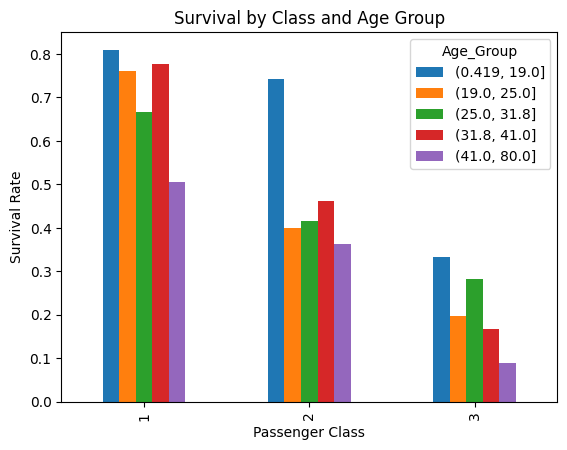

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("Titanic-Dataset.csv")

# PROBLEM 2: Count and drop null values in Age
null_age_count = df['Age'].isnull().sum()
print("Null values in Age column:", null_age_count)

# Drop rows where Age is null
df = df.dropna(subset=['Age'])
print("Age null values removed.\n")

# PROBLEM 3: One-hot encoding for 'Embarked'
# Create dummy variables
embarked_dummies = pd.get_dummies(df['Embarked'], prefix='Embarked')

# Add new columns to DataFrame
df = pd.concat([df, embarked_dummies], axis=1)

# Drop original 'Embarked' column
df = df.drop('Embarked', axis=1)

# Show first few rows
print("Data after one-hot encoding:")
print(df.head(), "\n")

# PROBLEM 4: Compare survival rate by Sex
survival_by_sex = df.groupby('Sex')['Survived'].mean()
print("Survival rate by Sex:")
print(survival_by_sex)

# Plot
survival_by_sex.plot(kind='bar')
plt.title("Survival Rate by Gender")
plt.xlabel("Gender")
plt.ylabel("Survival Rate")
plt.show()

# PROBLEM 5: Survival rate by Embarked port
# Recreate Embarked column from dummy columns for plotting
df['Embarked_port'] = embarked_dummies.idxmax(axis=1).str.replace("Embarked_", "")

survival_by_port = df.groupby('Embarked_port')['Survived'].mean()
print("\nSurvival rate by Embarked port:")
print(survival_by_port)

# Plot
survival_by_port.plot(kind='bar')
plt.title("Survival Rate by Embarkation Port")
plt.xlabel("Port")
plt.ylabel("Survival Rate")
plt.show()

# PROBLEM 6 (Optional): Survival by Age group and Pclass
# Create age groups (5 quantiles)
df['Age_Group'] = pd.qcut(df['Age'], 5)

# Calculate mean survival by class and age group
survival_age_class = df.groupby(['Pclass', 'Age_Group'])['Survived'].mean()
print("\nSurvival by Pclass and Age Group:")
print(survival_age_class)

# Plot
survival_age_class.unstack().plot(kind='bar')
plt.title("Survival by Class and Age Group")
plt.xlabel("Passenger Class")
plt.ylabel("Survival Rate")
plt.show()
